In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 9)

In [122]:
# Importing scraped data
df = pd.read_csv("meta_stocks_.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
1,2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2,2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200
3,2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300
4,2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400
...,...,...,...,...,...,...,...
1567,2023-03-27,204.809998,205.860001,201.360001,202.839996,202.839996,18527200
1568,2023-03-28,200.149994,201.029999,197.899994,200.679993,200.679993,19127300
1569,2023-03-29,203.559998,205.720001,202.539993,205.350006,205.350006,18851100
1570,2023-03-30,203.380005,208.089996,202.820007,207.839996,207.839996,22608300


In [123]:
# checking for null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [124]:
# checking for duplicate values
df.duplicated().sum()

0

In [125]:
# checking for extreme stock prices(higher prices)
Q1 = df['Adj Close'].quantile(0.25)
Q3 = df['Adj Close'].quantile(0.75)
IQR = Q3 - Q1
boundary = [Q1 - (1.5 * IQR), Q3 + (1.5 * IQR)]
boundary

[49.946250915527386, 353.6562423706054]

In [126]:
extreme_prices = df[(df['Adj Close'] < boundary[0]) | (df['Adj Close'] > boundary[1])]
extreme_prices

,Date,Open,High,Low,Close,Adj Close,Volume
1128,2021-06-28,342.459991,358.140015,341.769989,355.640015,355.640015,29156100
1131,2021-07-01,346.820007,354.670013,346.500000,354.390015,354.390015,17137000
1132,2021-07-02,355.100006,356.440002,352.619995,354.700012,354.700012,11521300
1146,2021-07-23,360.910004,375.329987,357.190002,369.790009,369.790009,33694300
1147,2021-07-26,369.579987,374.440002,368.220001,372.459991,372.459991,14925200
1148,2021-07-27,371.910004,373.149994,364.549988,367.809998,367.809998,15705400
1149,2021-07-28,374.559998,377.549988,366.929993,373.279999,373.279999,29676900
1150,2021-07-29,361.000000,365.519989,356.739990,358.320007,358.320007,33413200
1151,2021-07-30,354.000000,360.730011,352.940002,356.299988,356.299988,15976200
1154,2021-08-04,352.420013,360.480011,351.510010,358.920013,358.920013,14180600


In [127]:
# highest stock closing price till date from 2017
df[df['Adj Close'] == df['Adj Close'].max()]

,Date,Open,High,Low,Close,Adj Close,Volume
1177,2021-09-07,375.880005,382.959991,373.149994,382.179993,382.179993,10793800


In [128]:
# lowest stock closing price till date from 2017
df[df['Adj Close'] == df['Adj Close'].min()]

,Date,Open,High,Low,Close,Adj Close,Volume
1470,2022-11-03,90.080002,90.459999,88.410004,88.910004,88.910004,60664000


## Visualization of data

<AxesSubplot:>

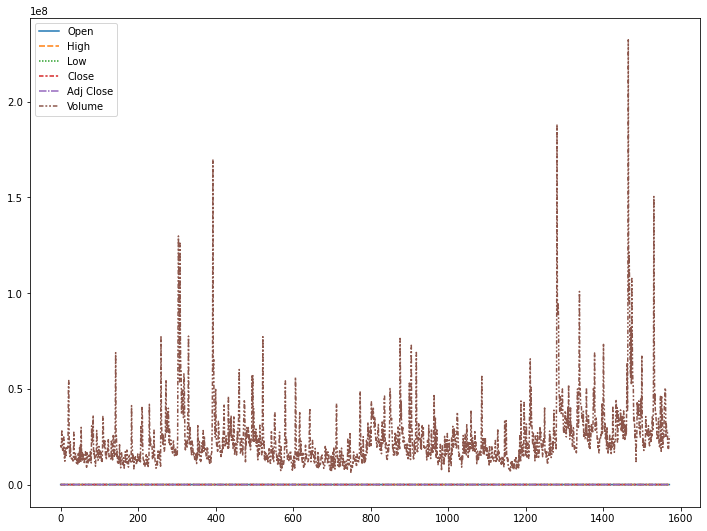

In [129]:
sns.lineplot(data=df)

<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

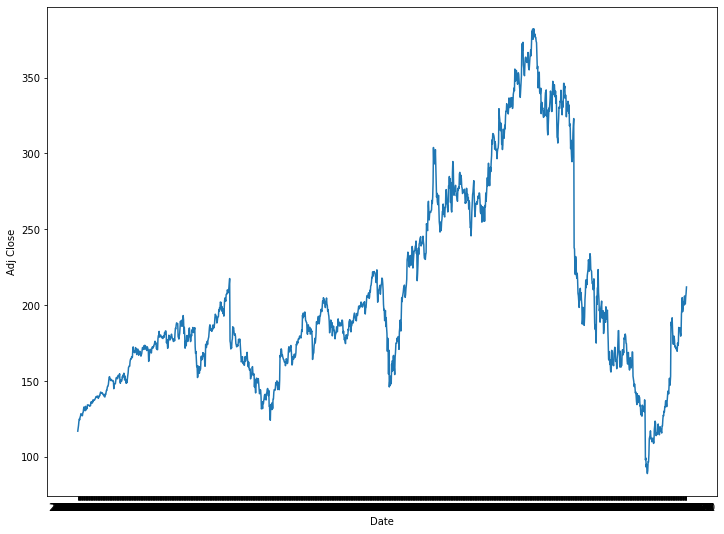

In [130]:
sns.lineplot(data=df, x="Date", y="Adj Close")

<AxesSubplot:ylabel='Adj Close'>

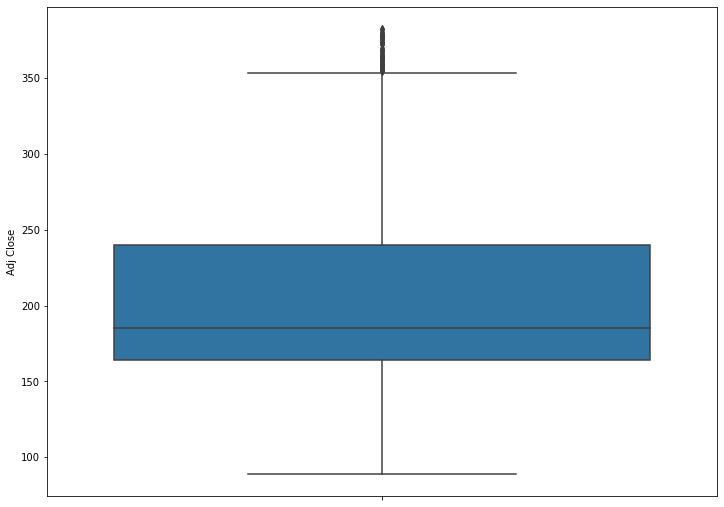

In [131]:
sns.boxplot(y='Adj Close', data=df)

<AxesSubplot:ylabel='Close'>

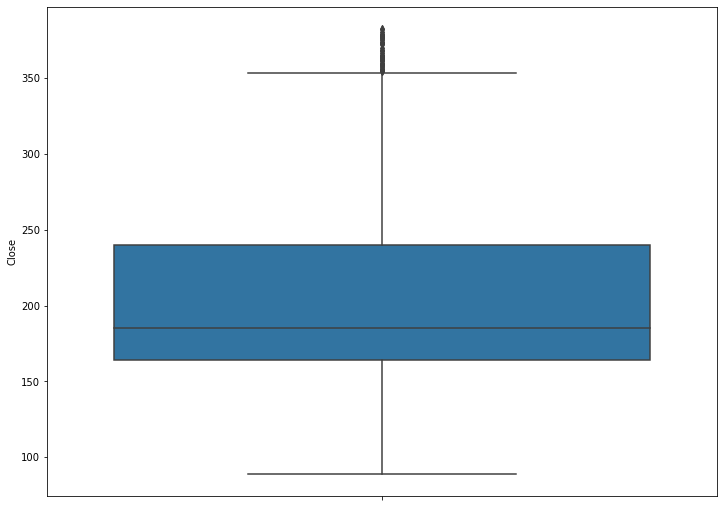

In [132]:
sns.boxplot(y='Close', data=df)

<AxesSubplot:ylabel='Volume'>

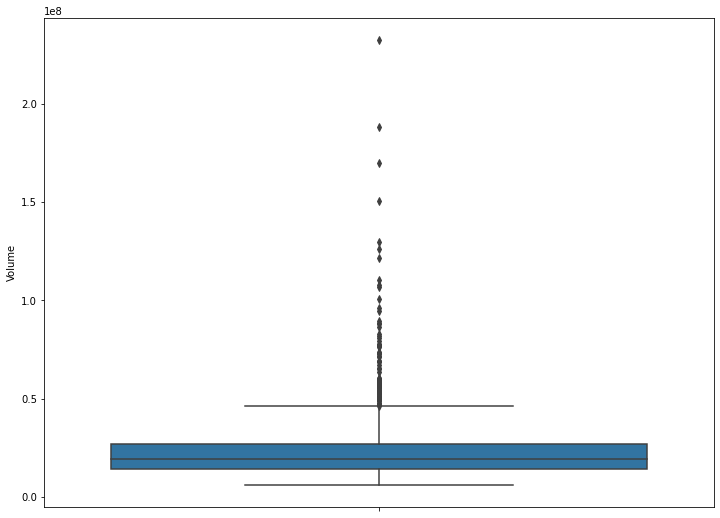

In [133]:
sns.boxplot(y='Volume', data=df)

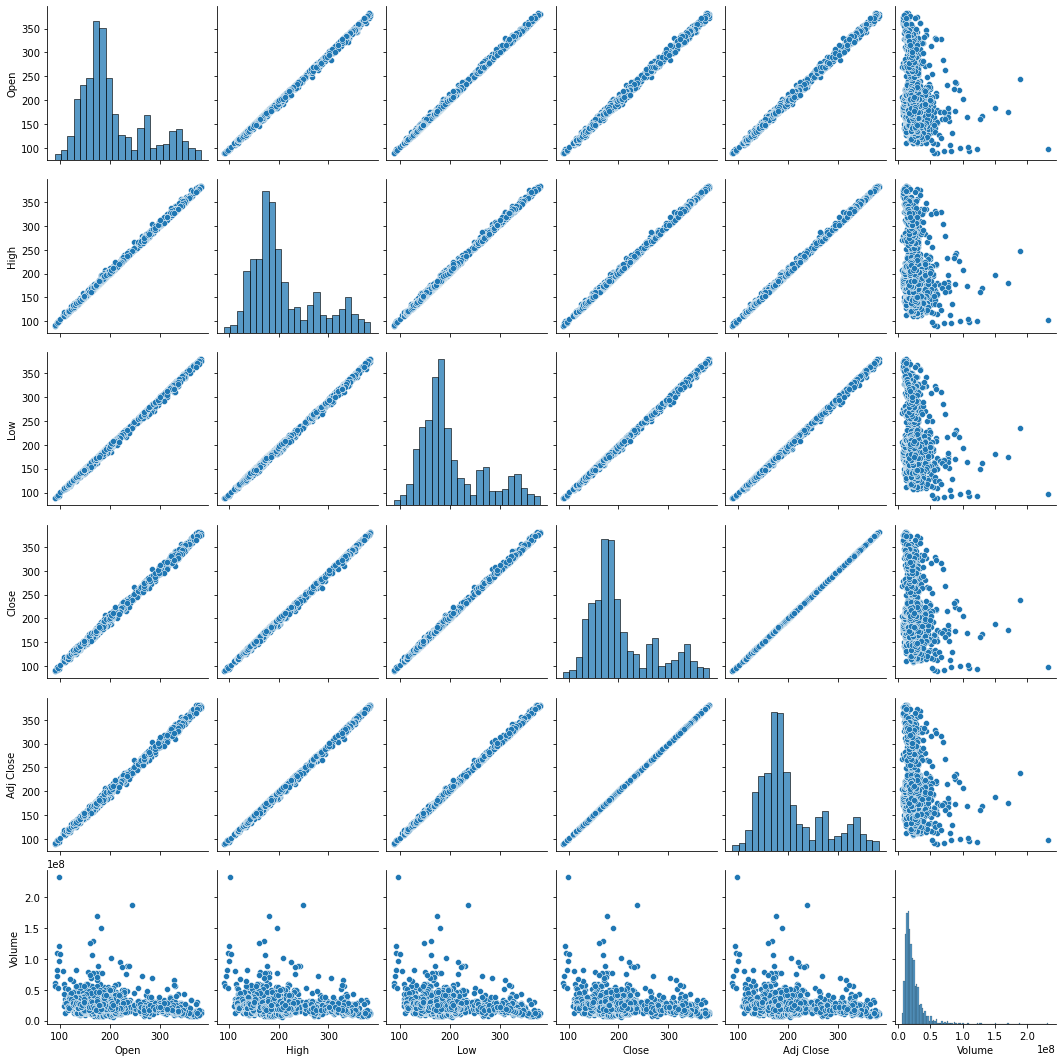

In [134]:
sns.pairplot(df)

In [135]:
import plotly.express as px

In [136]:
fig = px.scatter(df, x='Date', y='Adj Close')
fig.show()

## Data Modelling

In [137]:
# Taking only the 'Adj Close'=> Adjusted close column
df_temp = pd.DataFrame(df['Adj Close'])
df_temp

,Adj Close
0,116.860001
1,118.690002
2,120.669998
3,123.410004
4,124.900002
...,...
1567,202.839996
1568,200.679993
1569,205.350006
1570,207.839996


In [138]:
df_temp['value'] = df_temp['Adj Close']
df_temp = df_temp.drop(['Adj Close'], axis=1)
df_temp

,value
0,116.860001
1,118.690002
2,120.669998
3,123.410004
4,124.900002
...,...
1567,202.839996
1568,200.679993
1569,205.350006
1570,207.839996


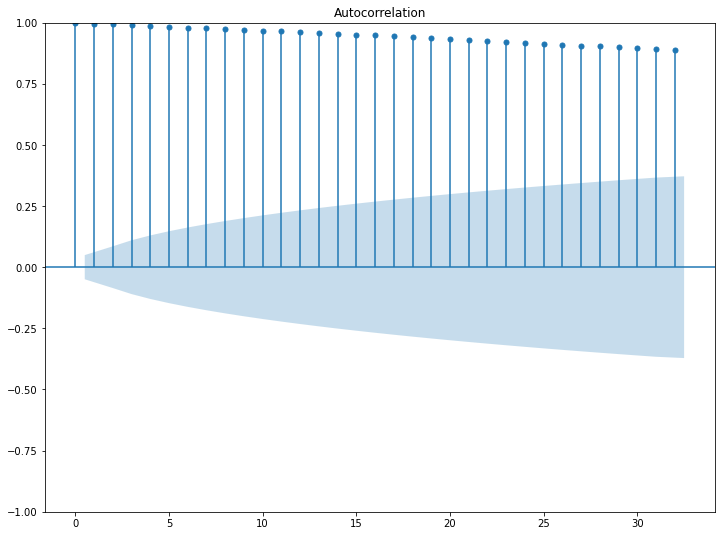

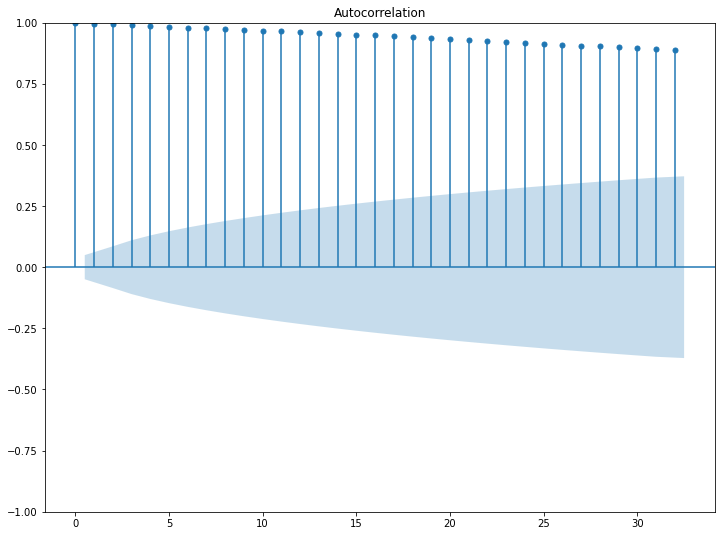

In [139]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_temp.value)

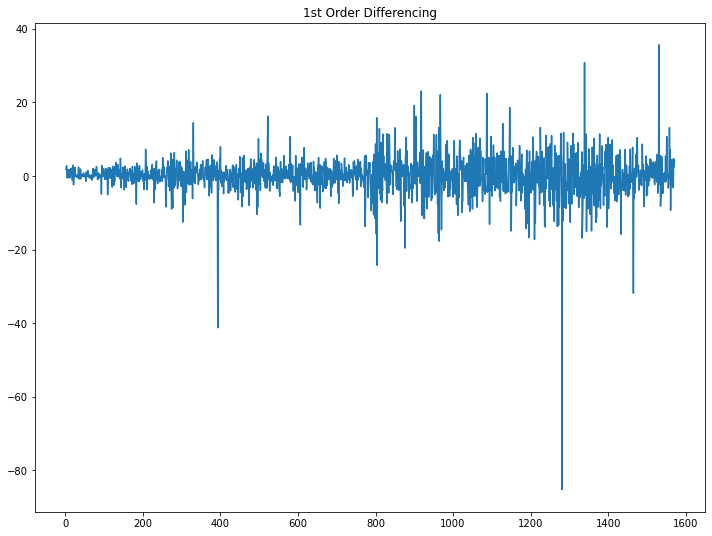

In [140]:
# plotting the first order differencing
plt.figure()
plt.title('1st Order Differencing')
plt.plot(df_temp.value.diff())
plt.show()

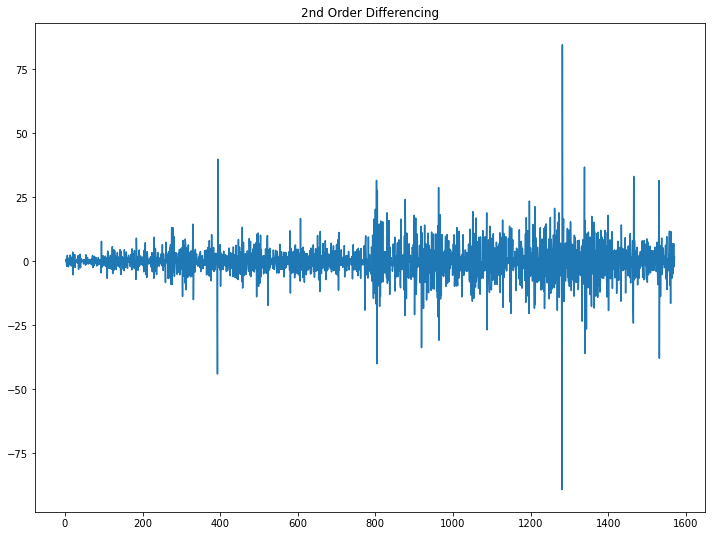

In [141]:
# plotting the first order differencing
plt.figure()
plt.title('2nd Order Differencing')
plt.plot(df_temp.value.diff().diff())
plt.show()

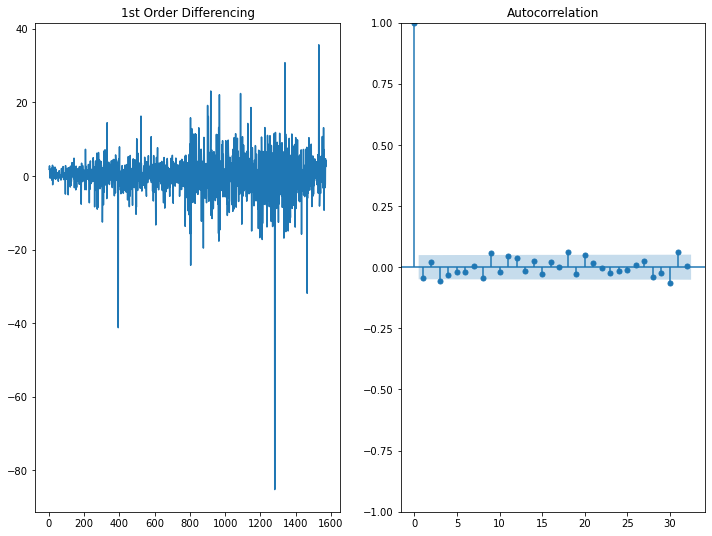

In [142]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df_temp.value.diff())

ax2 = f.add_subplot(122)
plot_acf(df_temp.value.diff().dropna(), ax=ax2)
plt.show()

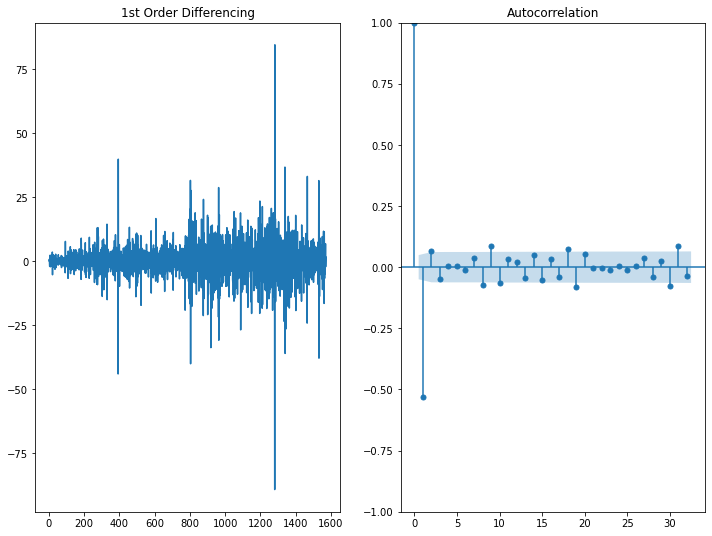

In [143]:
# Also trying for d=2
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df_temp.value.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(df_temp.value.diff().diff().dropna(), ax=ax2)
plt.show()

In [144]:
# Calculating p-values using Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_temp.value.dropna())
print('p-value: ', result[1])

result = adfuller(df_temp.value.diff().dropna())
print('p-value: ', result[1])

result = adfuller(df_temp.value.diff().diff().dropna())
print('p-value: ', result[1])

p-value:  0.3825466718009706
p-value:  0.0
p-value:  1.1493327459895922e-28


#### By the above values of p, we will consider differencing("d") as 1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



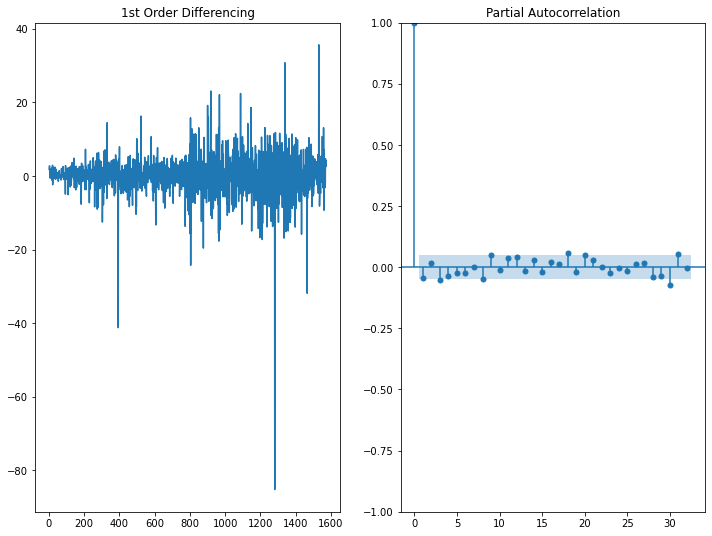

In [145]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df_temp.value.diff())

ax2 = f.add_subplot(122)
plot_pacf(df_temp.value.diff().dropna(), ax=ax2)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



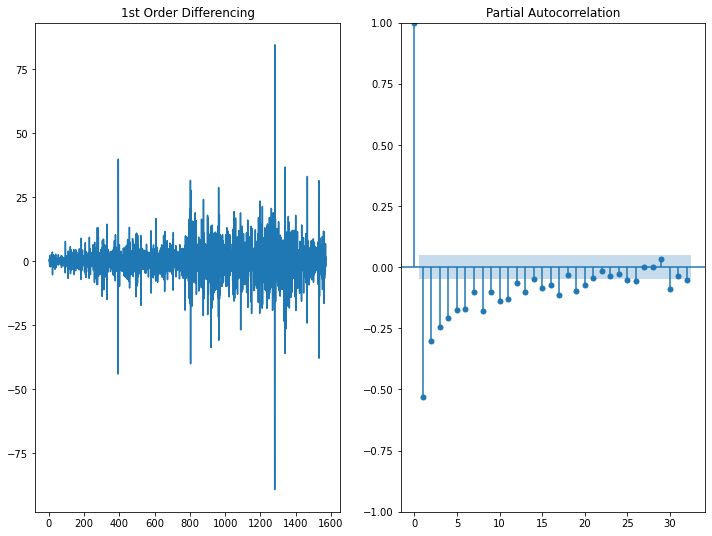

In [146]:
# Also trying for d=2
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df_temp.value.diff().diff())

ax2 = f.add_subplot(122)
plot_pacf(df_temp.value.diff().diff().dropna(), ax=ax2)
plt.show()

In both the plots, we see the 1st lag is the most significant. Thus, we consider “p” to be 1.

Finally, “q” can be estimated similarly by looking at the ACF plot instead of the PACF plot. Looking at the number of lags crossing the threshold, we can determine how much of the past would be significant enough to consider for the future. The ones with high correlation contribute more and would be enough to predict future values. From the plots above, the moving average (MA) parameter can be set to 1.

Thus, our final ARIMA model can be defined as ARIMA(p=1, d=1,q= 1).

In [147]:
from statsmodels.tsa.arima.model import ARIMA

In [148]:
arima_model = ARIMA(df_temp.value, order=(1,1,1))
model = arima_model.fit()

In [149]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                 1572
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4879.536
Date:                Tue, 04 Apr 2023   AIC                           9765.072
Time:                        20:32:58   BIC                           9781.150
Sample:                             0   HQIC                          9771.048
                               - 1572                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5335      0.265     -2.013      0.044      -1.053      -0.014
ma.L1          0.4876      0.275      1.771      0.077      -0.052       1.027
sigma2        29.1989      0.220    132.754      0.000      28.768      29.630
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            130972.80
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               4.68   Skew:                            -2.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        47.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

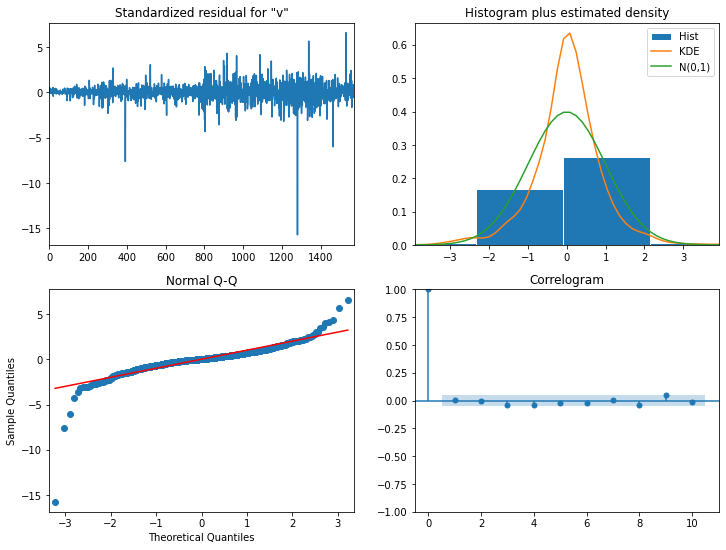

In [150]:
model.plot_diagnostics()
plt.show()